# What jobs?

# Load the data

In [16]:
import json

DEVICE = 'ibm_torino'
state = "Z1"
ROUNDS = 50


SOFT_MUL = 0.5

# file_name = f'../results/{state}_{ROUNDS}.json'
file_name = f'../results/BW_2BIT_{DEVICE}_{state}_{ROUNDS}_soft_{SOFT_MUL}_v2.json'


with open(file_name, 'r') as f:
    decoding_data = json.load(f)

print(len(decoding_data.keys()))

2


# Get the cummulative error dict

In [17]:
import numpy as np

d_new_dict = {}
for key, result_list in decoding_data.items():
    for result in result_list:
        if result.get("totshots", 0) != 0:
            shots = result["totshots"]
            continue
        else:
            d_new = int(result["d_new"])
            error_list = result["error_list"]
            nb_subsets = len(error_list)
            mean_err = np.mean(error_list)
            print(d_new, mean_err, shots * nb_subsets)
        if d_new in d_new_dict:
            d_new_dict[d_new]["mean_err_per_bit"] += mean_err
            d_new_dict[d_new]["shots"] += shots * nb_subsets
        else:
            d_new_dict[d_new] = {
                "mean_err_per_bit": mean_err,
                "shots": shots * nb_subsets,
            }

print(d_new_dict.keys())
print(d_new_dict)

err_rate_dict = {}

for d_new, data in d_new_dict.items():
    err_rate_dict[d_new] = data["mean_err_per_bit"] / data["shots"] 

print(err_rate_dict)

55 8528.5 30756
51 8338.5 30756
47 8858.5 30756
43 8825.5 30756
39 8615.0 30756
35 8770.0 30756
31 8452.0 30756
27 8749.333333333334 46134
23 8653.333333333334 46134
19 9042.25 61512
15 8748.5 61512
11 8891.833333333334 92268
7 9046.5 153780
3 9516.285714285714 430584
55 6531.0 25164
51 6410.0 25164
47 7146.5 25164
43 7112.5 25164
39 6979.5 25164
dict_keys([55, 51, 47, 43, 39, 35, 31, 27, 23, 19, 15, 11, 7, 3])
{55: {'mean_err_per_bit': 15059.5, 'shots': 55920}, 51: {'mean_err_per_bit': 14748.5, 'shots': 55920}, 47: {'mean_err_per_bit': 16005.0, 'shots': 55920}, 43: {'mean_err_per_bit': 15938.0, 'shots': 55920}, 39: {'mean_err_per_bit': 15594.5, 'shots': 55920}, 35: {'mean_err_per_bit': 8770.0, 'shots': 30756}, 31: {'mean_err_per_bit': 8452.0, 'shots': 30756}, 27: {'mean_err_per_bit': 8749.333333333334, 'shots': 46134}, 23: {'mean_err_per_bit': 8653.333333333334, 'shots': 46134}, 19: {'mean_err_per_bit': 9042.25, 'shots': 61512}, 15: {'mean_err_per_bit': 8748.5, 'shots': 61512}, 11: {'

# Plot

Text(0.5, 1.0, '2BIT decoding ibm_torino Z1 50 rounds')

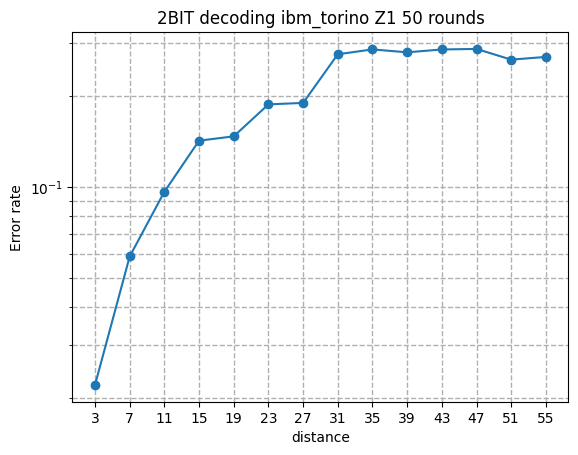

In [18]:
import matplotlib.pyplot as plt

plt.plot(err_rate_dict.keys(), err_rate_dict.values(), 'o-')
plt.ylabel('Error rate')
plt.xlabel('distance')
plt.xticks(list(err_rate_dict.keys()))
plt.yscale('log')
plt.grid(True, which="both", linestyle='--', linewidth=1)
plt.title(f'2BIT decoding {DEVICE} {state} {ROUNDS} rounds')

In [9]:
err_rate_dict

{55: 0.00012517882689556508,
 51: 0.00015200286123032904,
 47: 0.0004023605150214592,
 43: 0.0007063662374821174,
 39: 0.001198140200286123,
 35: 0.0016452074391988555,
 31: 0.002449928469241774,
 27: 0.0031036401208075024,
 23: 0.004065331425846448,
 19: 0.006460121602288984,
 15: 0.010155132331902718,
 11: 0.009991456048323001,
 7: 0.01040379113018598,
 3: 0.006493149835041313}